# Above Ground Biomass - Species-specific

## Overview

This notebook walks us through an introduction to making a request to Above Ground Biomass (AGB) Geospatial Analystics API for Species specific Data Layer.

Above Ground Biomass (AGB) Geospatial Analystics APIs are available as <i>Geospatial Analytics V4 API</i> version, as an additional functionality over Geospatial Analytics V3 API version

Geospatial Analytics - Above Ground Biomass (AGB) supports both historical carbon units retrieval and prediction of the same based on the available data. Let's say the user requests information for 2023 and 2024, of which the system has the data for 2023 alone and doesn't pertain the 2024's data, instead of not retrieving anything the system predicts the 2024's information relying on 2023's data for reference.

For all future predictions in all the below examples, the predictive models use the Coupled Model Intercomparison Project Phase 6 (CMIP6) – climate change patterns data and Soil Grid data. 

The primary use case is for calculating historic and future carbon units based on species-specific data layer that is able to generate baseline and predictive results.

Above Ground Biomass (AGB) Species specific Data Layer is a data layer that provides the historical and predictive carbon units and CO2 captures by depending on specific species.

<b>The Above Ground Biomass (AGB) Data Set is currently having the geo coverage for Brazil in the temporal range from 2015 to 2100.</b>

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial Analytics API credentials in a file named `secrets.ini` in the below format:

```
[EIS]
api.host = https://api.ibm.com/geospatial/run/na/core/v4
api.key = <Your Geospatial Analytics API key>
api.tenant_id = <Your Geospatial Analytics Tenant ID>
api.org_id = <Your Geospatial Analytics Org ID>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../auth/secrets.ini')```

Before starting, you have to install ibm pairs using `pip3 install -U ibmpairs`

Now, let's create a client object using the API_KEY, TENANT_ID (or CLIENT_ID) and ORG_ID to create an authenticated HTTP client Authentication token using 'ibmpairs.client' module, to use it in the subsequent steps.

In [4]:
# install the EIS SDK if not installed already
# pip2 install -U ibmpairs 
import ibmpairs.authentication as authentication
import ibmpairs.client as client
import ibmpairs.query as query
import ibmpairs.catalog as catalog

import matplotlib.pyplot as plt
import os,  datetime
import json
import pandas as pd
import rasterio

import configparser

config = configparser.RawConfigParser()
config.read('../../auth/secrets.ini')

# Getting the Auth token
EIS_ORG_ID     = config.get('EIS', 'api.org_id') 
EIS_TENANT_ID  = config.get('EIS', 'api.tenant_id') 
EIS_API_KEY     = config.get('EIS', 'api.key')

EIS_client_v4 = client.get_client(org_id    = EIS_ORG_ID,
                                  tenant_id = EIS_TENANT_ID,
                                  api_key     = EIS_API_KEY,
                                  version   = 4
                                )

2024-06-13 12:31:29 - paw - INFO - The client authentication method is assumed to be OAuth2.
2024-06-13 12:31:29 - paw - INFO - Legacy Environment is False
2024-06-13 12:31:29 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2024-06-13 12:31:32 - paw - INFO - Authentication success.
2024-06-13 12:31:32 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v4


The following code snippet submits the query for the AGB Data Layer <i>above-ground-biomass</i>  for years 2022, 2023, 2024 and 2025 using Geospatial Analytics V4 query API, waits for it to finish, downloads the data to the download folder, loads the data to memory and displays it on screen. This could take a few minutes to complete as all the data is brought together.

Let's go ahead, define and submit a query.

<b>Note:</b> Before starting, we have to install ibm pairs using `pip3 install -U ibmpairs`

In [2]:
# Define and submit the query
species_specific_title = "AGB - Species specific"

species_specific_query_object = query.submit({ 
              "name": "Species Specific Above Ground Biomass - " + species_specific_title,
              "spatial": {
                "geojson": {
                      "type": "Feature",
                      "geometry": {
                        "type":"MultiPolygon", 
                        "coordinates":
                             [[[[-56.49494853197744, -4.934848296682963],
                             [-56.48928801836558, -3.6083526788328615],
                             [-54.709999906370456, -3.557507634991951],
                             [-54.65905528386371, -4.857770253824474],
                             [-56.49494853197744, -4.934848296682963]]]],
                                  }   
                           }
              },
              "temporal": { "years": [2022, 2023, 2024, 2025]  },
              "layers": [     
                {
                  "datalayer": "tree-species-above-ground-biomass-natural",
                  "properties": {"species" : "para_rubber"}
                }
              ]
            },EIS_client_v4)

# download the result of the query (this will poll until the result is ready)
species_specific_query_object.download(verify=False)

2024-06-13 12:03:15 - paw - INFO - TASK: submit STARTING.
2024-06-13 12:03:17 - paw - INFO - The query was successfully submitted with the id: 1718236800_23597132.
2024-06-13 12:03:17 - paw - INFO - TASK: submit COMPLETED.
2024-06-13 12:03:17 - paw - INFO - TASK: download STARTING.
2024-06-13 12:03:18 - paw - INFO - The query 1718236800_23597132 has the status Queued.
2024-06-13 12:03:19 - paw - INFO - The query 1718236800_23597132 has the status Queued.
2024-06-13 12:03:51 - paw - INFO - The query 1718236800_23597132 has the status Running.
2024-06-13 12:04:22 - paw - INFO - The query 1718236800_23597132 has the status Running.
2024-06-13 12:04:53 - paw - INFO - The query 1718236800_23597132 has the status Running.
2024-06-13 12:05:24 - paw - INFO - The query 1718236800_23597132 has the status Running.
2024-06-13 12:05:55 - paw - INFO - The query 1718236800_23597132 has the status Running.
2024-06-13 12:06:27 - paw - INFO - The query 1718236800_23597132 has the status Running.
2024-06

{
    "download_file_name": "1718236800_23597132",
    "download_folder": "/Users/srikantht/EIS/Projects/Environmental-Intelligence-internal/geospatial/v4_apis/samples/quickstart/agb_species_specific/download/",
    "download_status": "SUCCEEDED",
    "id": "1718236800_23597132",
    "layers": [
        {
            "datalayer": "tree-species-above-ground-biomass-natural",
            "properties": {
                "species": "para_rubber"
            }
        }
    ],
    "merge_response": {},
    "name": "Species Specific Above Ground Biomass - AGB - Species specific",
    "spatial": {
        "geojson": {
            "geometry": {
                "coordinates": [
                    [
                        [
                            [
                                -56.49494853197744,
                                -4.934848296682963
                            ],
                            [
                                -56.48928801836558,
                            

Let's look at the summary from the result of the query:

In [5]:
species_specific_para_rubber_title='Above Ground Biomass-species specific :'+str(species_specific_query_object.temporal.years)
species_specific_file_list = species_specific_query_object.list_files()
#This gets the folder location of where the query result is downloaded.
download_location = species_specific_query_object.get_download_folder() + species_specific_query_object.id
summary_file = download_location + '/' +'Above Ground Biomass-species specific summary agb.json'

summary = pd.read_json(summary_file)
print(species_specific_para_rubber_title)
display(summary)

Above Ground Biomass-species specific :[2022, 2023, 2024, 2025]


year                                 layer_name    area_in_ha  \
0  2022  tree-species-above-ground-biomass-natural  2.916451e+06   
1  2023  tree-species-above-ground-biomass-natural  2.916451e+06   
2  2024  tree-species-above-ground-biomass-natural  2.916451e+06   
3  2025  tree-species-above-ground-biomass-natural  2.916451e+06   

   baseline_agb_min_units  baseline_agb_max_units  baseline_agb_mean_units  \
0                0.028237               81.483353                28.735200   
1                0.028237               81.483353                30.871398   
2                     NaN                     NaN                      NaN   
3                     NaN                     NaN                      NaN   

   baseline_total_agb_units  baseline_total_carbon_tons  \
0              1.016874e+09                5.084372e+08   
1              1.092767e+09                5.463837e+08   
2                       NaN                         NaN   
3                       NaN                         NaN   

   baseline_total_co2_tons agb_analytics_type  predicted_total_agb_units  \
0             1.865964e+09         historical                        NaN   
1             2.005228e+09         historical                        NaN   
2                      NaN         prediction               1.165475e+09   
3                      NaN         prediction               1.239499e+09   

   predicted_total_carbon_tons  predicted_total_co2_tons  
0                          NaN                       NaN  
1                          NaN                       NaN  
2                 5.827374e+08              2.138646e+09  
3                 6.197496e+08              2.274481e+09

Let's define some utility functions to display the downloaded raster tiff files.

In [6]:
def get_extent(f):
    with open(f, 'r') as ff:
        stats = json.load(ff)
    boundingBox=stats["boundingBox"]
    myextent = [boundingBox["minLongitude"],boundingBox["maxLongitude"],boundingBox["minLatitude"],boundingBox["maxLatitude" ] ]
    return myextent


def display_raster(raster_file_name, colorMap, title = None, Max=None, Min=None, myextent=None):
    if raster_file_name.endswith('.tiff'):
        with rasterio.open(raster_file_name) as raster_file:
            if not myextent:
                myextent=get_extent(raster_file_name+".json")
            data = raster_file.read(1)
            plt.figure(figsize = (20, 12))
            if Max is None:
                Max=data.max()
            if Min is None:
                Min = data.min()
            plt.imshow(data, cmap = colorMap, vmin = Min, vmax = Max,extent = myextent)
            if not title:
                title=os.path.basename(raster_file_name)
            plt.title(title)
            plt.colorbar()
            plt.show()

Let's display the resulting raster tiff file(s) using the above methods.

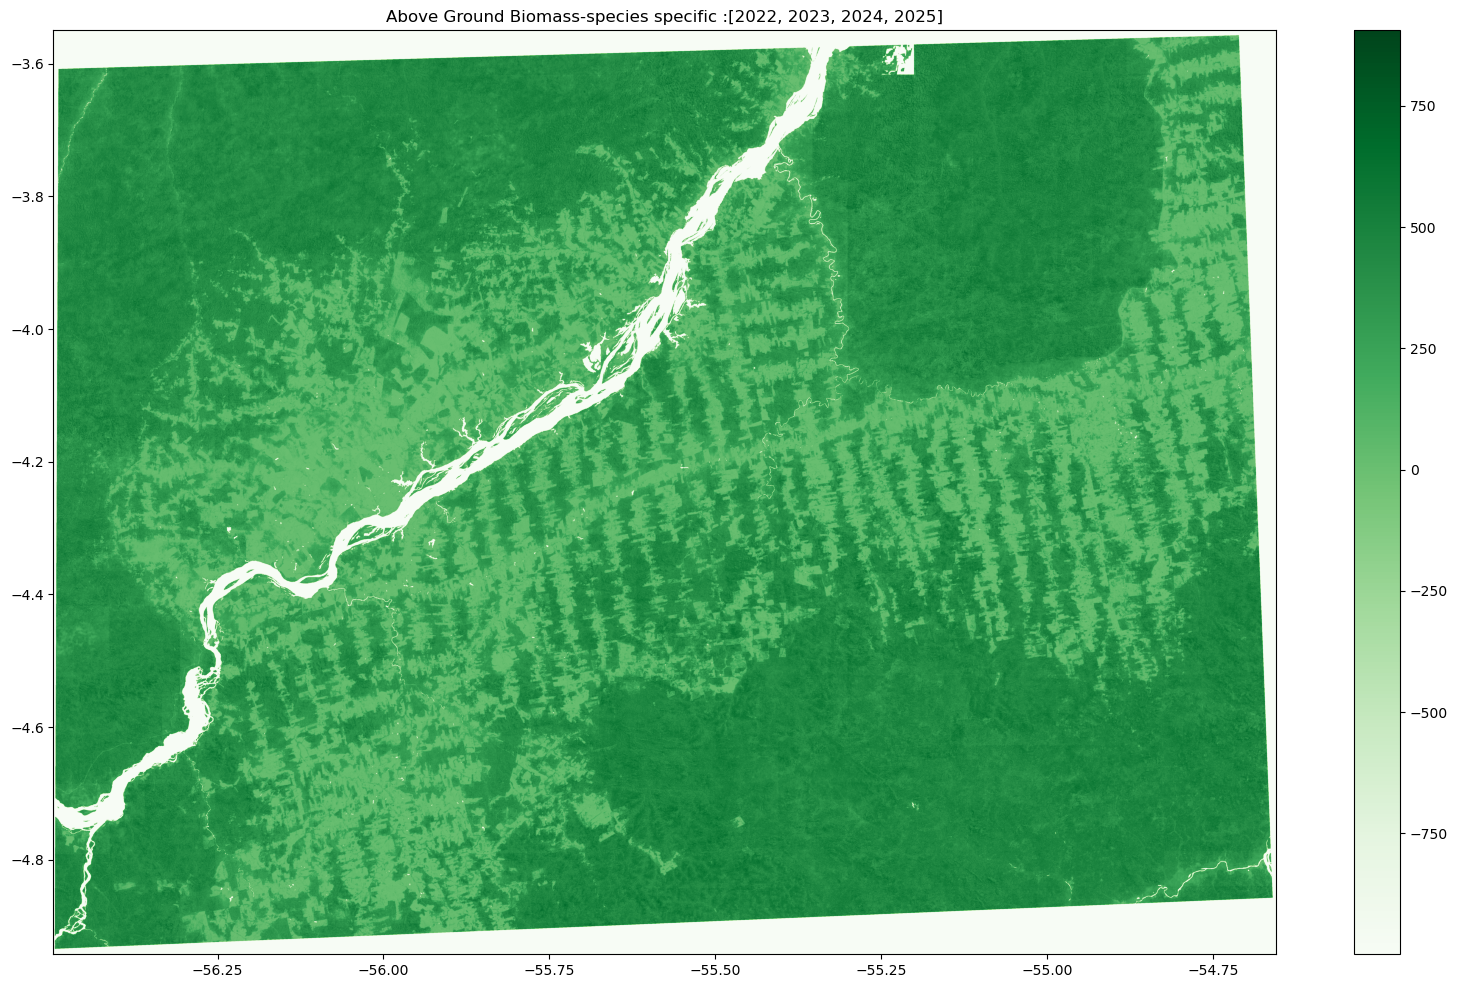

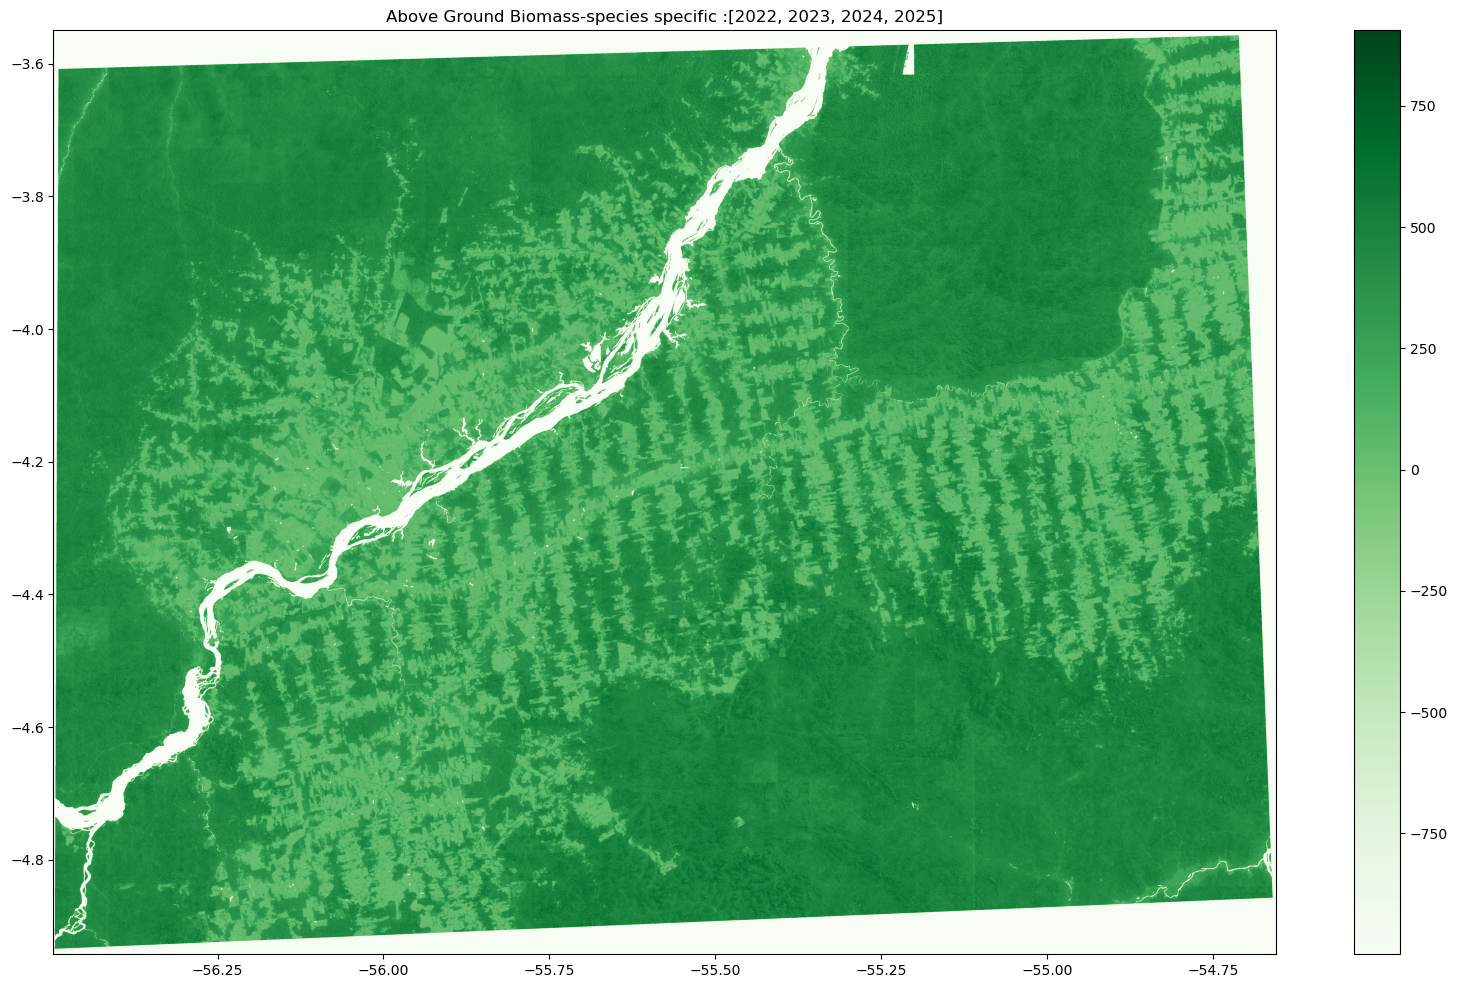

In [7]:
# Now display the resulting Tiff files.
species_specific_file_list.sort()
for f in species_specific_file_list:
    if f.endswith('.tiff'):
        display_raster(f, 'Greens', title=species_specific_para_rubber_title)   # , Max=300)

#### Understanding the Sample

<b>Code:</b>

Let's go over the details of the above example, 

The above code snippet is run using Geospatial Analytics V4 query API to retrieve carbon units and CO2 capture for:

* A specific area which is a Multipolygon defined as a standard Geojson format for the spatial data.
* The temporal intevals' timestamp as years. In this example, we are passing the years from 2022 to 2025 as the temporal range. Years from 2022 and 2023 are historical baseline years while 2024 and 2025 are prediction years. Note that any years beyond the current year are prediction years.
* For a specific species type <i>para_rubber</i>.

Submitting the query above does not immediately return data because the raster area query takes time and its operation is asynchronous. In this case we use `query.submit()`. This submits the query to Geospatial Analytics V4 query API. One the query is submitted, we use `download()` method that checks the status of the query as it runs and, once complete, downloads the results of the query as a zip file.

You can see from the output of the call that that `species_specific_query_object.download()` prints the status of the job as it progresses.

On the first line of the log, you can see the query Id that has been assigned by Geospatial Analytics to the query job will look something like "1718236800_23597132" and is unique for each query submitted. After this, you can see the query transistion through Queued, Initializing, Running and finally succeeded. You won't necessarily see all of these stages printed out depending on how busy the Geospatial Analytics system is at the time you submit.

Once the processing is complete you can see that the resulting query zip file is placed in the download folder. This folder is usually placed inside the directory where you run this notebook from.

The library will automatically unzip this zip file for you and into a directory named after the query Id. In this case the contents are as follows:

- Above Ground Biomass-species specific summary agb.json
- Above Ground Biomass-species specific agb-01_01_2022T00_00_00.tiff
- Above Ground Biomass-species specific agb-01_01_2022T00_00_00.tiff.json
- Above Ground Biomass-species specific agb-01_01_2023T00_00_00.tiff
- Above Ground Biomass-species specific agb-01_01_2023T00_00_00.tiff.json
- data_acknowledgement.txt
- output.info

The `Above Ground Biomass-species specific summary agb.json` file gives you a brief about the information from each year specified in the query.

As you can see the summary json file gives the agb units, carbon units and CO2 capture of historical and predicted years. It also provides the area in hectares, baseline agb min, max, mean and total units for the Data Layer <i>tree-species-above-ground-biomass-natural</i>.

``` json
[
    {
        "year": 2022,
        "layer_name": "tree-species-above-ground-biomass-natural",
        "area_in_ha": 2916450.629599,
        "baseline_agb_min_units": 0.028237,
        "baseline_agb_max_units": 81.483353,
        "baseline_agb_mean_units": 28.7352,
        "baseline_total_agb_units": 1016874347.76407,
        "baseline_total_carbon_tons": 508437173.882035,
        "baseline_total_co2_tons": 1865964428.147068,
        "agb_analytics_type": "historical"
    },
    {
        "year": 2023,
        "layer_name": "tree-species-above-ground-biomass-natural",
        "area_in_ha": 2916450.629599,
        "baseline_agb_min_units": 0.028237,
        "baseline_agb_max_units": 81.483353,
        "baseline_agb_mean_units": 30.871398,
        "baseline_total_agb_units": 1092767358.221962,
        "baseline_total_carbon_tons": 546383679.110981,
        "baseline_total_co2_tons": 2005228102.3373,
        "agb_analytics_type": "historical"
    },
    {
        "year": 2024,
        "layer_name": "tree-species-above-ground-biomass-natural",
        "area_in_ha": 2916450.629599,
        "predicted_total_agb_units": 1165474710.682635,
        "predicted_total_carbon_tons": 582737355.341318,
        "predicted_total_co2_tons": 2138646094.102635,
        "agb_analytics_type": "prediction"
    },
    {
        "year": 2025,
        "layer_name": "tree-species-above-ground-biomass-natural",
        "area_in_ha": 2916450.629599,
        "predicted_total_agb_units": 1239499262.292857,
        "predicted_total_carbon_tons": 619749631.146428,
        "predicted_total_co2_tons": 2274481146.307392,
        "agb_analytics_type": "prediction"
    }
]

```

The .tiff.json files hold metadata about the raster tiff images like the information about pixel and raster image statistics, For example:
``` json
{
    "pixelType": "fl",
    "pixelNoDataVal": -9999,
    "spatialRef": "EPSG:4326",
    "boundingBox": {
        "minLatitude": -4.942464,
        "maxLatitude": -3.549824,
        "minLongitude": -56.497408,
        "maxLongitude": -54.654208
    },
    "pixelDimensions": {
        "pixelSizeDegreeLatitude": 0.000256,
        "pixelSizeDegreeLongitude": 0.000256,
        "numberPixelsLatitude": 5440,
        "numberPixelsLongitude": 7200
    },
    "rasterStatistics": {
        "pixelMin": 0.31374,
        "pixelMax": 905.3705833454812,
        "pixelCount": 39168000,
        "pixelMean": 319.279996,
        "pixelStandardDeviation": 174.4709
    },
    "agbAnalytics": {
        "area_in_ha": 2916450.629599,
        "baseline_agb_min_units": 0.028237,
        "baseline_agb_max_units": 81.483353,
        "baseline_agb_mean_units": 28.7352,
        "baseline_total_agb_units": 1016874347.76407,
        "baseline_total_carbon_tons": 508437173.882035,
        "baseline_total_co2_tons": 1865964428.147068
    }
}

```

The `data_acknowledgement.txt` file contains acknowledgements associated with the data we provide. 

The `output.info` file maps the images files back to the Geospatial Analytics data layers that were used to produce them:

``` json
{"files":[{"name":"Above Ground Biomass-canopy height-01_01_2022T00_00_00","datalayerId":"38001","datalayerName":"canopy height","timestamp":1640995200000,"layerType":"raster"},{"name":"Above Ground Biomass-canopy height-01_01_2023T00_00_00","datalayerId":"38001","datalayerName":"canopy height","timestamp":1672531200000,"layerType":"raster"}]}
```


<b>Output:</b>

The output is displayed in two forms: 
- The first one is a table that presents the data of each year into different rows. If we observe the table, the data is presented in such a way that the historical information is put first and the predicted information is put later to give the user an understanding of how the agb cover has increased over the years and how it is predicted based on the available historical infomartion.
- The second one is the raster tiff file plotted on the coordinate system. 

There are many other ways you can visualize and understand the data that's been retrieved, for example:

We can draw a combined line chart with the available data from both baseline and predicted information 

Combined agb units, total carbon tons and CO2 tons for AGB - Species specific


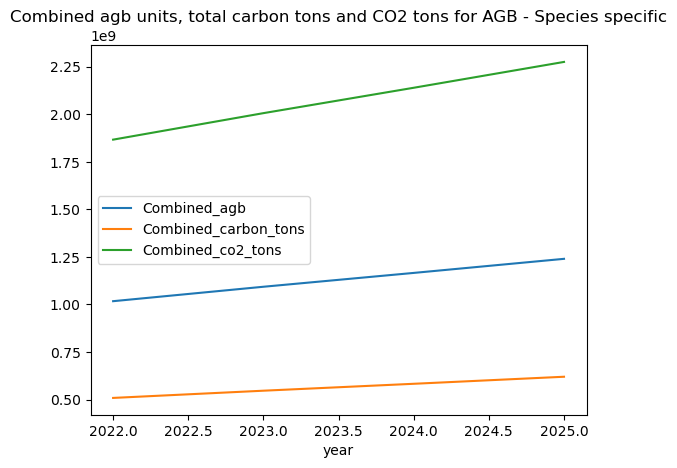

Combined_agb  Combined_carbon_tons  Combined_co2_tons
year                                                       
2022  1.016874e+09          5.084372e+08       1.865964e+09
2023  1.092767e+09          5.463837e+08       2.005228e+09
2024  1.165475e+09          5.827374e+08       2.138646e+09
2025  1.239499e+09          6.197496e+08       2.274481e+09

In [8]:
agb_predictions_title='Combined agb units, total carbon tons and CO2 tons for '+ species_specific_title
combined_df = pd.DataFrame(summary[['year', 'baseline_total_agb_units','baseline_total_carbon_tons','baseline_total_co2_tons','predicted_total_agb_units','predicted_total_carbon_tons','predicted_total_co2_tons']]).set_index('year')
plot_pcombined_df=pd.DataFrame()
plot_pcombined_df['Combined_agb'] = combined_df['baseline_total_agb_units'].fillna(0) + combined_df['predicted_total_agb_units'].fillna(0)
plot_pcombined_df['Combined_carbon_tons'] = combined_df['baseline_total_carbon_tons'].fillna(0) + combined_df['predicted_total_carbon_tons'].fillna(0)
plot_pcombined_df['Combined_co2_tons'] = combined_df['baseline_total_co2_tons'].fillna(0) + combined_df['predicted_total_co2_tons'].fillna(0)
g = plot_pcombined_df.plot.line(title=agb_predictions_title)
print(agb_predictions_title)
plt.show()
plot_pcombined_df

We can leverage the capabilities of Geospatial Analytics and Python together and even visualize the raster tiff file on a realtime map by executing the below code snippet.


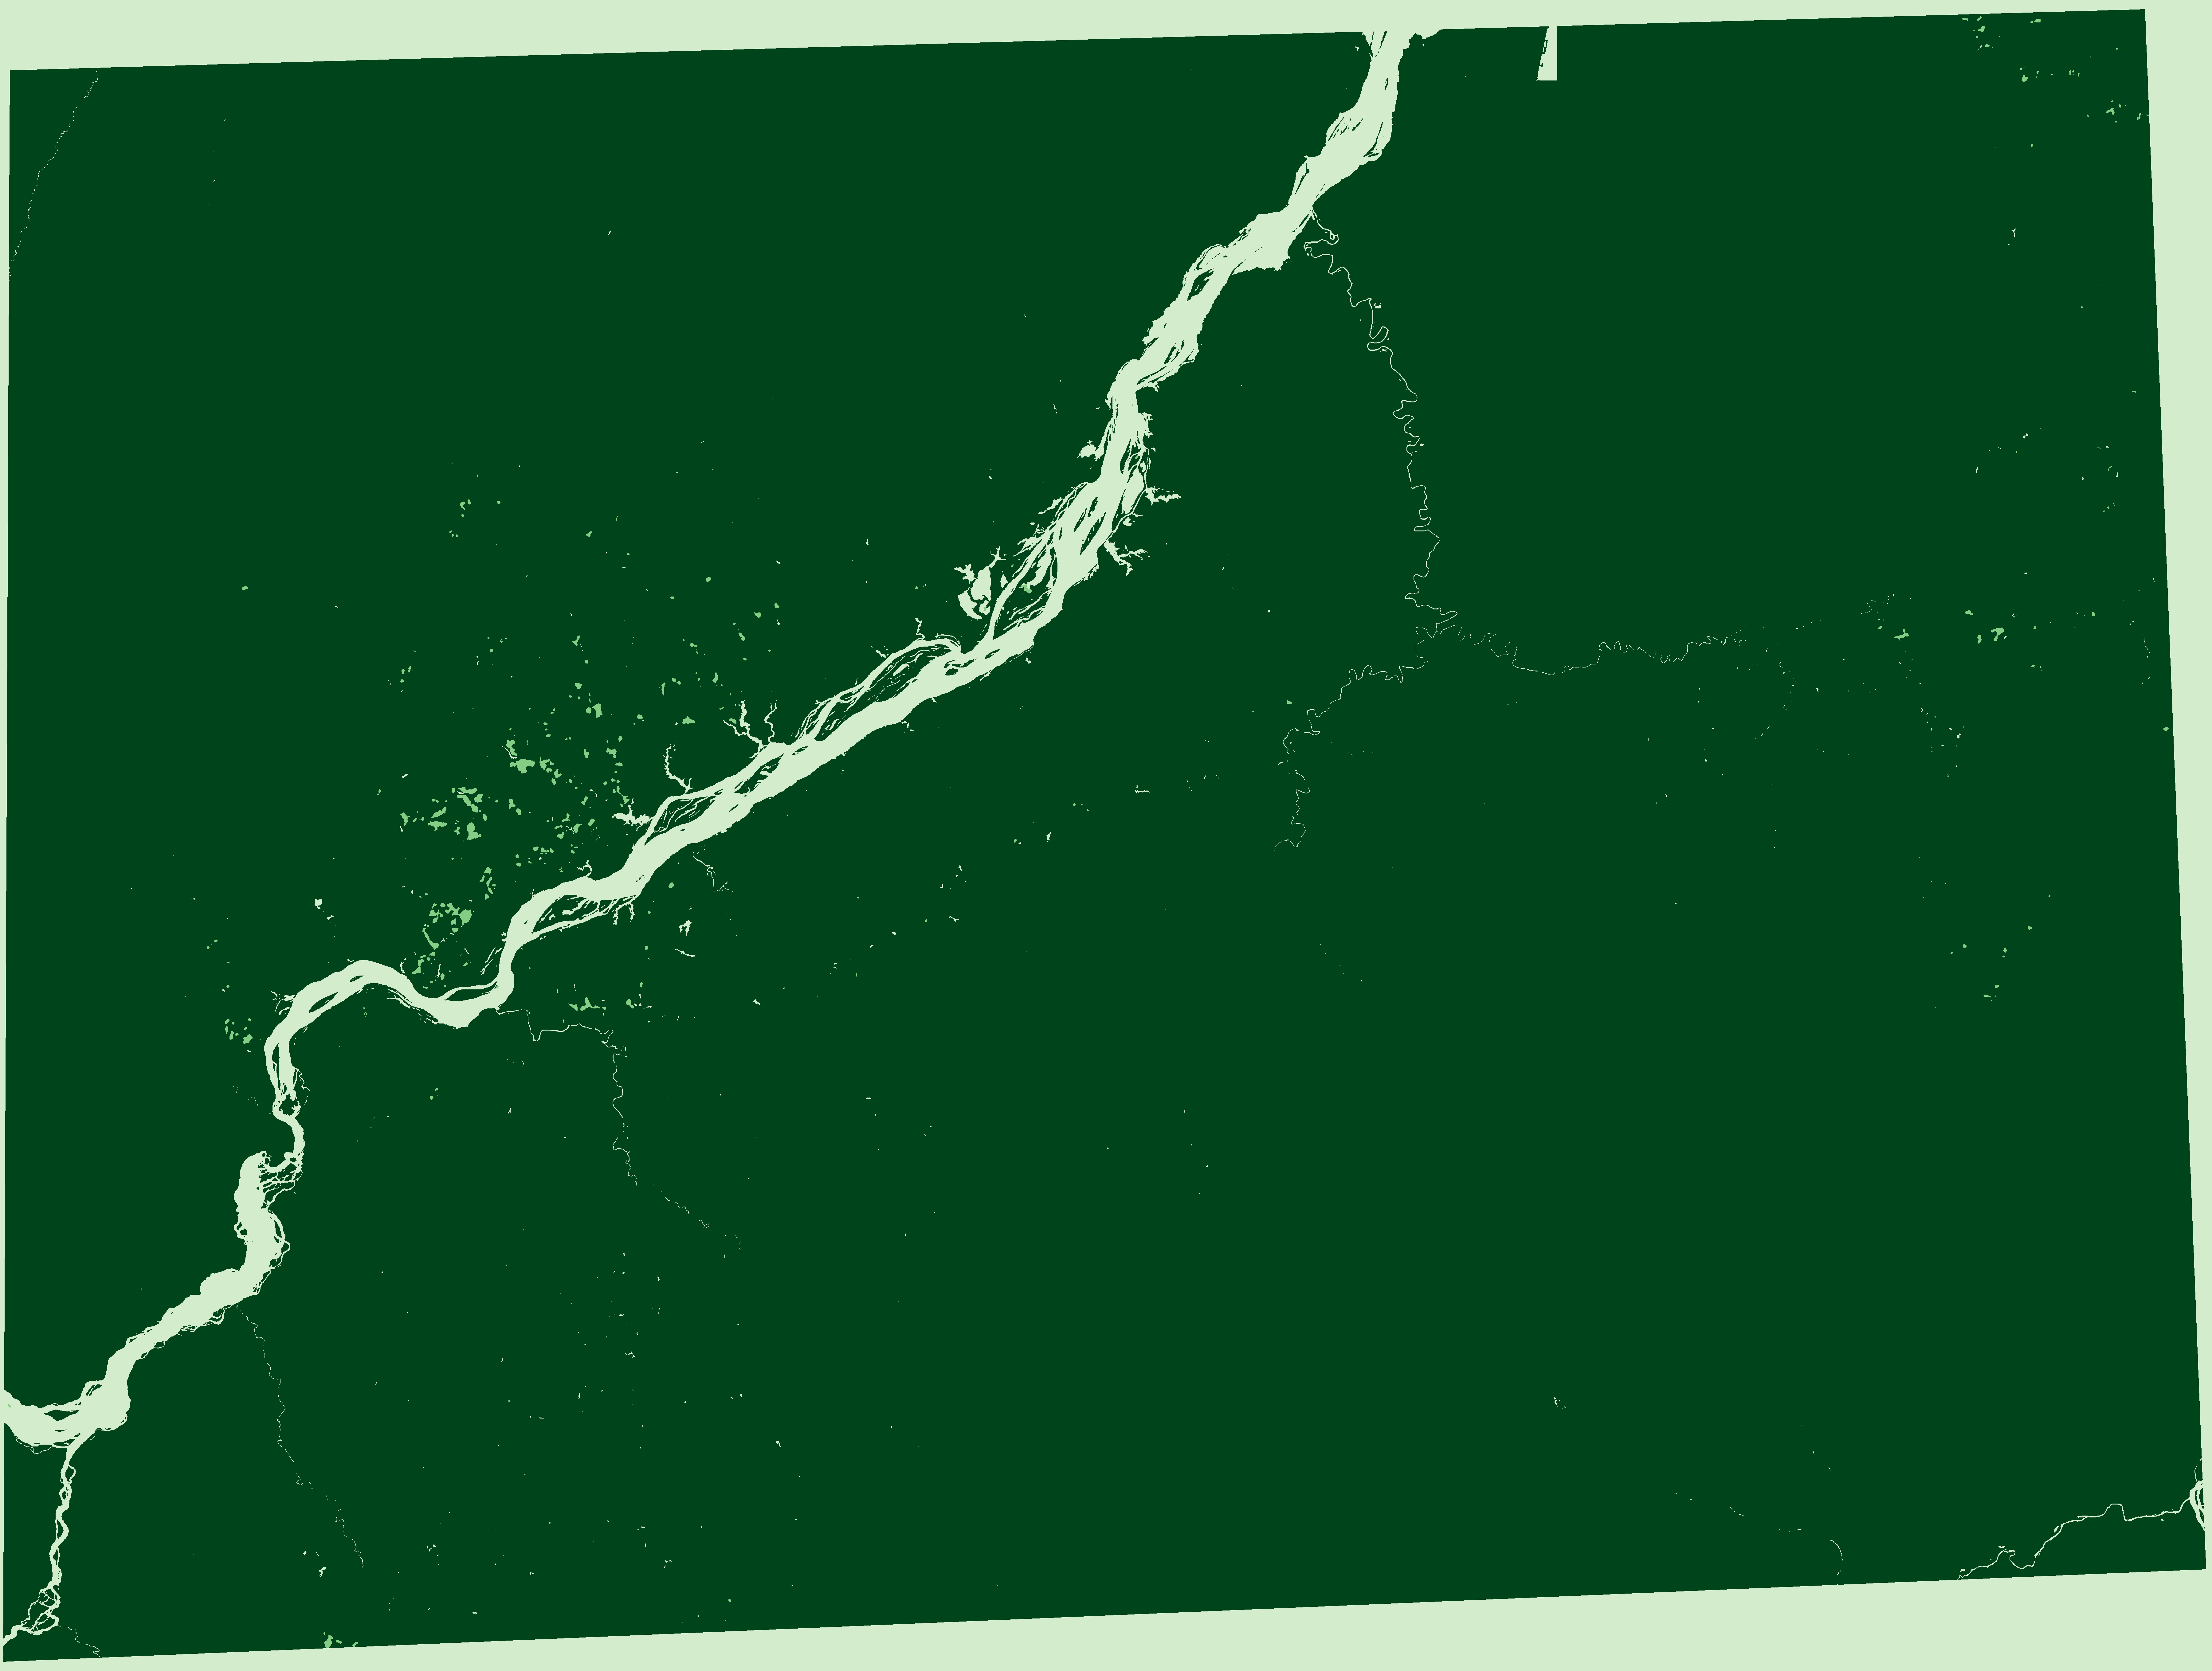

<Figure size 640x480 with 0 Axes>

In [9]:
# For visualizing maps
import folium,numpy as np
import branca.colormap as cm
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

for species_specific_file in species_specific_file_list:
    if species_specific_file.endswith('.tiff'):
        with rasterio.open(species_specific_file) as raster:
            rb = raster.bounds
            Map = folium.Map( max_bounds=True,
                                location=[(rb.bottom+rb.top)/2, (rb.left+rb.right)/2],   # [40.8768,-73.6195],
                                zoom_start=10,
                                min_lat=rb.bottom, # min_lat,
                                max_lat=rb.top,    # max_lat,
                                min_lon=rb.left,   # min_lon,
                                max_lon=rb.right   #max_lon
                                )
            # Display the boundaries of the raster image for a visual check
            folium.PolyLine([
                [rb.bottom, rb.left], [rb.top, rb.left],
                [rb.top, rb.right], [rb.bottom, rb.right],
                [rb.bottom, rb.left]
            ], weight=1.0, opacity=0.5).add_to(Map)
        with rasterio.open(species_specific_file) as raster_file:
            jpg_img_filename=species_specific_file.replace(".tiff",".jpg")
            png_img_filename=species_specific_file.replace(".tiff",".png")
            data = raster_file.read(1)
            data[data==-9999] = np.nan
            data[data==0] = np.nan
            cmap = plt.get_cmap('Greens')
            new_cmap_colors = cmap(np.linspace(0.2, 1, cmap.N))
            new_cmap = mcolors.LinearSegmentedColormap.from_list('DarkTerrain', new_cmap_colors)
            colored_data = (new_cmap(data) * 255).astype(np.uint8)
            plt.savefig(jpg_img_filename, bbox_inches='tight', pad_inches=0)
            im = Image.fromarray(colored_data)
            im.save(jpg_img_filename, "PNG")
            folium.raster_layers.ImageOverlay(
                        image=jpg_img_filename,opacity=0.8,
                        bounds=[[rb.bottom, rb.left], [rb.top, rb.right]]
                    ).add_to(Map)
Map